In [0]:
class Trader():
  upper_band=0
  lower_band=0

  def __init__(self,name,n_std,window,prices):
    self.name=name
    self.n_std=n_std
    self.window=window    
    Trader.no_of_shares=2500
    Trader.balance=900000

  def bands(self,prices):
    window_is=int(self.window)
    self.sma=sum(prices[-window_is:])/window_is
    self.std=statistics.stdev(prices[-window_is:])
    self.upper_band=self.sma + self.n_std*self.std
    self.lower_band=self.sma - self.n_std*self.std

  def buy(self,n,price):
    if n*price <= self.balance:
      self.balance -= n*price
      self.no_of_shares += n
      print('{} shares BOUGHT by {} @ {}.'.format(n,self.name,price))  
    else:
      raise Exception('Overloaded! Not enough balance.')

  def sell(self,n,price):
    if n <= self.no_of_shares:
      self.balance += n * price
      self.no_of_shares -= n
      print('{} shares SOLD by {} @ {}.'.format(n,self.name,price))
    else:
      raise Exception('Overloaded! Not enough shares.')

In [0]:
def price_determination(book,prices):
  global PdQd,PsQs,Qs,Qd,qs,qd
  Qd=[]
  Qs=[]
  PdQd=[]
  PsQs=[]

  for i in range(len(book)):
    trader=book[i]
    trader.bands(prices[-40:])

    #BIDDING : Buyers and sellers : Demand and Supply
    qd=int(trader.balance/trader.lower_band)
    Qd.append(qd)
    qs=trader.no_of_shares
    Qs.append(qs)

    PdQd.append(qd*trader.lower_band)
    PsQs.append(qs*trader.upper_band)

  price=(sum(PdQd)+sum(PsQs)) / (sum(Qd)+sum(Qs))
  price=(int(price*1000))/1000
  return price    

In [0]:
import statistics

book={}
count=0
prices=[200+i for i in range(50)]

import numpy as np
std=list(np.linspace(0.1,4,38))
win=list(np.linspace(2,40,38))
std_win=[[i,j] for i in std for j in win]
for i,j in std_win:
  book[count]=Trader('trader'+str(count),i,j,prices)
  count+=1

In [0]:
count_empty=0
def bid_matching_and_trade_execution(book,price):
  global sellers,buyers
  sellers=[]
  buyers=[]
  sell_count=0
  for i in range(len(book)):
    trader=book[i]
    if trader.upper_band <= price and trader.no_of_shares > 0:
      sellers.append([trader.upper_band,trader.no_of_shares,i])
    if trader.lower_band >= price and trader.balance >= price:
      buyers.append([trader.lower_band,i])

  #BREAK IF EMPTY
  print("len buyers {} len sellers {}".format(len(buyers),len(sellers)))
  if len(buyers)==0:
    
    #print("EITHER BUYERS OR SELLERS LIST IS EMPTY...{}".format(count_empty))
    
    raise Exception("BUYER LIST IS EMPTY")
  elif len(sellers)==0:
     raise Exception("SELLERS LIST IS EMPTY")
  else:
    pass

  print('SUCCESS BOTH SIDES AVAILABLE!!')
  
  #DESCENDING ORDER : sellers
  sellers = np.array(sellers)
  sellers=sellers[sellers[:,0].argsort()]
  sellers=sellers.tolist()
  sellers.reverse()

  #DESCENDING ORDER : buyers
  buyers = np.array(buyers)
  buyers=buyers[buyers[:,0].argsort()]
  buyers=buyers.tolist()
  buyers.reverse()

  #SELL
  for row in sellers:
    print("SELLING!")
    trader=book[row[2]]
    n=row[1]

    trader.sell(n,price)
    sell_count += n
    #print('sell count : {}'.format(sell_count))

  #BUY
  for row in buyers:
    
    trader=book[row[1]]
    n=int(trader.balance/price)

    if sell_count >= n:
      print('BUYING!')
      trader.buy(n,price)
      sell_count -= n
    elif n > sell_count >0:
      print('BUYING!')
      trader.buy(sell_count,price)
      sell_count=0
    
    else:
      break

  #BUY BACK : UNSOLD SHARES
  for row in sellers:
   
    trader=book[row[2]]
    n=row[1]

    if sell_count >= n:
      print("BUY BACK!")
      trader.buy(n,price)
      sell_count -= n
    elif n > sell_count >0:
      print("BUY BACK!")
      trader.buy(sell_count,price)
      sell_count=0
    else:
      break
    

In [49]:
for i in range(30):
  price = price_determination(book,prices)
  prices.append(price)
  try:
    bid_matching_and_trade_execution(book,price)
  except Exception:
    count_empty+=1
    print("EMPTY..{}".format(count_empty))
  else:
    pass
  

len buyers 294 len sellers 1
SUCCESS BOTH SIDES AVAILABLE!!
SELLING!
6327.0 shares SOLD by trader28 @ 235.771.
BUYING!
9 shares BOUGHT by trader14 @ 235.771.
BUYING!
6318.0 shares BOUGHT by trader15 @ 235.771.
len buyers 304 len sellers 0
EMPTY..5
len buyers 307 len sellers 0
EMPTY..6
len buyers 298 len sellers 0
EMPTY..7
len buyers 281 len sellers 0
EMPTY..8
len buyers 253 len sellers 0
EMPTY..9
len buyers 217 len sellers 13
SUCCESS BOTH SIDES AVAILABLE!!
SELLING!
6294.0 shares SOLD by trader456 @ 235.719.
SELLING!
6294.0 shares SOLD by trader418 @ 235.719.
SELLING!
6294.0 shares SOLD by trader380 @ 235.719.
SELLING!
6294.0 shares SOLD by trader342 @ 235.719.
SELLING!
6294.0 shares SOLD by trader304 @ 235.719.
SELLING!
6294.0 shares SOLD by trader266 @ 235.719.
SELLING!
6294.0 shares SOLD by trader228 @ 235.719.
SELLING!
6294.0 shares SOLD by trader190 @ 235.719.
SELLING!
6294.0 shares SOLD by trader152 @ 235.719.
SELLING!
6294.0 shares SOLD by trader114 @ 235.719.
SELLING!
6294.0 sha

In [48]:
len(book)

1444

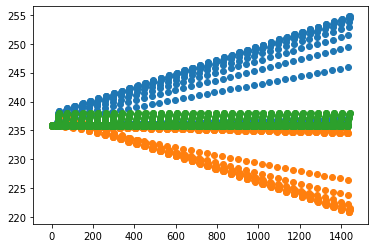

In [42]:
import matplotlib.pyplot as plt

l=[book[i].upper_band for i in range(len(book))]
import matplotlib.pyplot as plt
plt.scatter(range(len(l)),l)
x=[book[i].lower_band for i in range(len(book))]
plt.scatter(range(len(x)),x)
x=[book[i].sma for i in range(len(book))]
plt.scatter(range(len(x)),x)

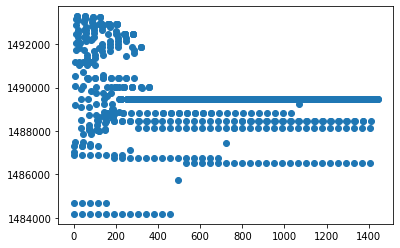

In [39]:
import matplotlib.pyplot as plt

#PORTFOLIO VALUE
x=[book[i].no_of_shares*price+book[i].balance for i in range(len(book))]
plt.scatter(range(len(x)),x)